## Sentimental Analysis

In [1]:
#pip install nltk

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
#nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report
from wordcloud import WordCloud
from os import path
from PIL import Image
from imblearn.over_sampling import SMOTE
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing the data
df_business = pd.read_json("yelp_academic_dataset_business.json", lines=True, orient='columns', chunksize=1000000)
df_reviews = pd.read_json("yelp_academic_dataset_review.json", lines=True, orient='columns', chunksize=1000000)

In [4]:
#Reading the data
sub_business = next(df_business)
sub_review = next(df_reviews)

In [5]:
display(sub_business.head(10))
display(sub_review.head(10))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,1,None,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16
8,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33
9,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06


In [6]:
#Preprocessing the data
city = sub_business[(sub_business['city'] == 'Philadelphia') & (sub_business['is_open'] == 1)]
phil = city[['business_id','name','stars']]
phil

,business_id,name,stars
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,4.0
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,4.0
19,ROeacJQwBeh05Rqg7F6TCg,BAP,4.5
35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,3.5
82,ppFCk9aQkM338Rgwpl2F5A,Wawa,3.0
...,...,...,...
150306,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,3.0
150326,JDM7kiCEmeBc_5W-z6eZZw,2601 Parkway Apartments,3.0
150329,9U1Igcpe954LoWZRmNc-zg,Hand & Stone Massage And Facial Spa,3.0
150334,LJ4GjQ1HL6kqvIPpNUNNaQ,Shanti Yoga and Ayurveda,4.5


In [7]:
missing_values = phil.isna().sum()
missing_values

business_id    0
name           0
stars          0
dtype: int64

In [8]:
merged_df = pd.merge(phil, sub_review, on='business_id', how='inner')
merged_df

,business_id,name,stars_x,review_id,user_id,stars_y,useful,funny,cool,text,date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,4.0,BXQcBN0iAi1lAUxibGLFzA,6_SpY41LIHZuIaiDs5FMKA,4,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,4.0,uduvUCvi9w3T2bSGivCfXg,tCXElwhzekJEH6QJe3xs7Q,4,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,4.0,a0vwPOqDXXZuJkbBW2356g,WqfKtI-aGMmvbA9pPUxNQQ,5,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,4.0,MKNp_CdR2k2202-c8GN5Dw,3-1va0IQfK-9tUMzfHWfTA,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,4.0,D1GisLDPe84Rrk_R4X2brQ,EouCKoDfzaVG0klEgdDvCQ,4,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35
...,...,...,...,...,...,...,...,...,...,...,...
114033,2mHJetAZqfkm-QH-nOMu9g,"Advanced Dental Designs, P.C.",2.0,3REa0AzsHQgK8gzLP71VKw,n3Gg5mIokBirc8s_unINnQ,1,7,4,3,"Dr. Jasmine performed the quickest, laziest te...",2017-11-10 17:33:33
114034,2mHJetAZqfkm-QH-nOMu9g,"Advanced Dental Designs, P.C.",2.0,OdUsrsnUHdQmhBRnT3xi1w,Y2dhNLLyzeHTJ4zet86rRA,1,4,6,0,"I wouldn't go to this dentist, even though the...",2013-10-22 16:39:23
114035,2mHJetAZqfkm-QH-nOMu9g,"Advanced Dental Designs, P.C.",2.0,88BrIRnNkRGgpJRpk0627A,ufMo6dKUqifw_t0MsXerSg,3,0,0,0,This facility is alright. It is very small and...,2017-06-24 12:40:28
114036,2mHJetAZqfkm-QH-nOMu9g,"Advanced Dental Designs, P.C.",2.0,i8db4VsuJQbtwbOFN8bnRg,XuhpPK0bZgVenkGBh7KA6w,5,1,1,0,I had a wonderful experience considering I had...,2014-10-06 13:18:28


In [9]:
missing_values = merged_df.isna().sum()
missing_values

business_id    0
name           0
stars_x        0
review_id      0
user_id        0
stars_y        0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [10]:
merged_df.drop(columns=['stars_x'], inplace=True)

In [11]:
# Rename 'stars_x' to 'stars'
merged_df.rename(columns={'stars_y': 'stars'}, inplace=True)

In [12]:
merged_df

,business_id,name,review_id,user_id,stars,useful,funny,cool,text,date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,BXQcBN0iAi1lAUxibGLFzA,6_SpY41LIHZuIaiDs5FMKA,4,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,uduvUCvi9w3T2bSGivCfXg,tCXElwhzekJEH6QJe3xs7Q,4,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,a0vwPOqDXXZuJkbBW2356g,WqfKtI-aGMmvbA9pPUxNQQ,5,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,MKNp_CdR2k2202-c8GN5Dw,3-1va0IQfK-9tUMzfHWfTA,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,D1GisLDPe84Rrk_R4X2brQ,EouCKoDfzaVG0klEgdDvCQ,4,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35
...,...,...,...,...,...,...,...,...,...,...
114033,2mHJetAZqfkm-QH-nOMu9g,"Advanced Dental Designs, P.C.",3REa0AzsHQgK8gzLP71VKw,n3Gg5mIokBirc8s_unINnQ,1,7,4,3,"Dr. Jasmine performed the quickest, laziest te...",2017-11-10 17:33:33
114034,2mHJetAZqfkm-QH-nOMu9g,"Advanced Dental Designs, P.C.",OdUsrsnUHdQmhBRnT3xi1w,Y2dhNLLyzeHTJ4zet86rRA,1,4,6,0,"I wouldn't go to this dentist, even though the...",2013-10-22 16:39:23
114035,2mHJetAZqfkm-QH-nOMu9g,"Advanced Dental Designs, P.C.",88BrIRnNkRGgpJRpk0627A,ufMo6dKUqifw_t0MsXerSg,3,0,0,0,This facility is alright. It is very small and...,2017-06-24 12:40:28
114036,2mHJetAZqfkm-QH-nOMu9g,"Advanced Dental Designs, P.C.",i8db4VsuJQbtwbOFN8bnRg,XuhpPK0bZgVenkGBh7KA6w,5,1,1,0,I had a wonderful experience considering I had...,2014-10-06 13:18:28


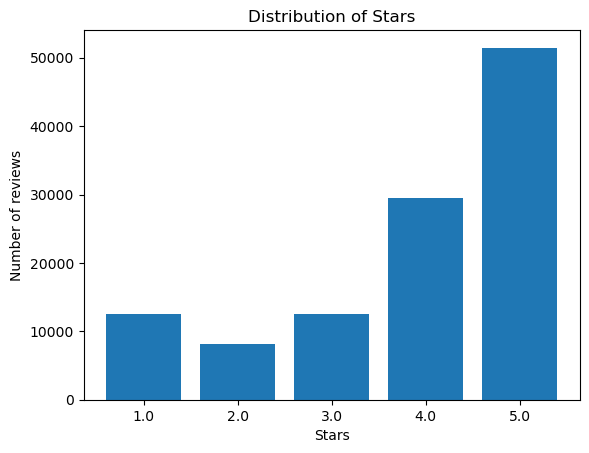

In [13]:
values, counts = np.unique(merged_df['stars'], return_counts=True)

plt.figure()
plt.bar(values, counts, tick_label=['1.0','2.0','3.0','4.0','5.0'])
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Number of reviews')
plt.show()

In [14]:
merged_df["Target"] = np.where(merged_df["stars"] >= 3, 1, 0)
merged_df.head(10)

,business_id,name,review_id,user_id,stars,useful,funny,cool,text,date,Target
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,BXQcBN0iAi1lAUxibGLFzA,6_SpY41LIHZuIaiDs5FMKA,4,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53,1
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,uduvUCvi9w3T2bSGivCfXg,tCXElwhzekJEH6QJe3xs7Q,4,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06,1
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,a0vwPOqDXXZuJkbBW2356g,WqfKtI-aGMmvbA9pPUxNQQ,5,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57,1
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,MKNp_CdR2k2202-c8GN5Dw,3-1va0IQfK-9tUMzfHWfTA,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57,1
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,D1GisLDPe84Rrk_R4X2brQ,EouCKoDfzaVG0klEgdDvCQ,4,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35,1
5,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,_hJu0u6nB-8LIeQJY4Vg4w,KQSRUu4Aapl0hG6eu2v8iw,4,1,0,0,This is my favorite bakery in Chinatown! I usu...,2018-03-17 23:47:25,1
6,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,DbARmo95_axUdC9FU8o_Jw,X_DkwPTzdO_VWzUcbUXREg,3,0,0,0,so I dropped in to this store since it was the...,2012-08-16 19:42:17,1
7,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,_xRGsS6QGpcD9LQJNtavuw,qUfRCH5NUyRDsJfM6jA5PQ,4,3,4,10,Impression: The good thing is that there are l...,2017-04-20 12:37:09,1
8,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,TLeFbl_5Cb1wcuaeQKX1ew,gNJNxucGoZ31nlH74EQpPg,4,0,0,0,Best egg tarts? \n\nI was lucky to get them fr...,2014-02-25 14:41:08,1
9,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,PXMn65bN0byT09LtOXUPuQ,NMOxipsnXc6olWdHYzXiYA,4,0,0,0,Little square cakes of happiness with cute bun...,2012-01-10 02:09:18,1


In [15]:
df_final = merged_df[['text','Target']]
df_final

,text,Target
0,This is nice little Chinese bakery in the hear...,1
1,This is the bakery I usually go to in Chinatow...,1
2,"A delightful find in Chinatown! Very clean, an...",1
3,I ordered a graduation cake for my niece and i...,1
4,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,1
...,...,...
114033,"Dr. Jasmine performed the quickest, laziest te...",0
114034,"I wouldn't go to this dentist, even though the...",0
114035,This facility is alright. It is very small and...,1
114036,I had a wonderful experience considering I had...,1


In [16]:
# Dividing the reviews to positive and negative
positive = df_final[df_final['Target']==1]['text']
negative = df_final[df_final['Target']==0]['text']

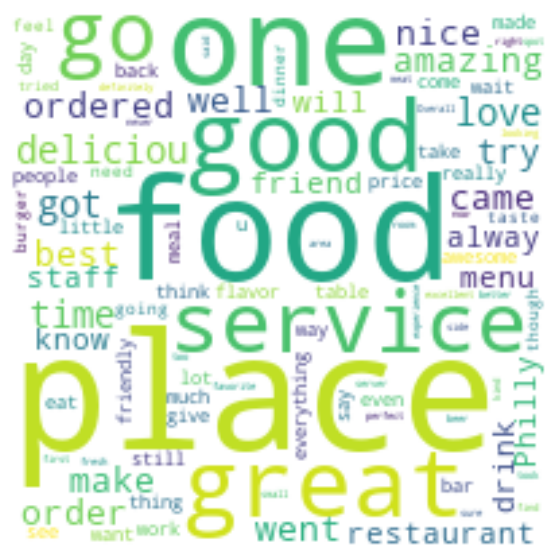

In [17]:
# Mask image
pos_mask = np.array(Image.open("smile.png"))

text_pos = " ".join(i for i in positive)

# Create a word cloud image
wc_pos = WordCloud(background_color="white", max_words=100, mask=pos_mask, contour_width=10, contour_color='firebrick')

# Generate a wordcloud
wc_pos.generate(text_pos)

plt.figure(figsize=(14,7))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

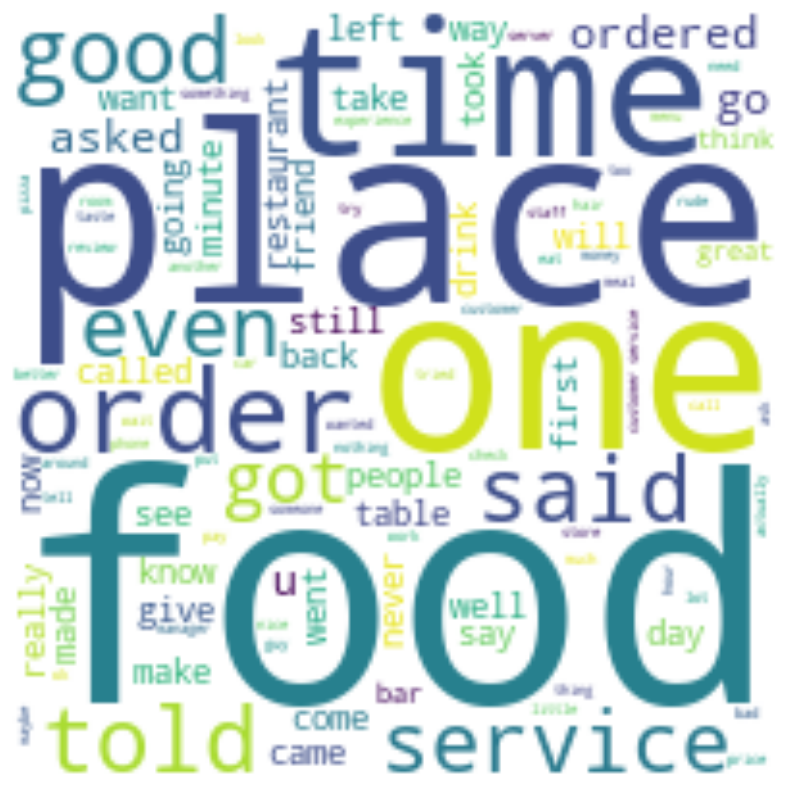

In [18]:
# Mask image
neg_mask = np.array(Image.open("smile.png"))
                    
# Create a word cloud image
text_neg = " ".join(i for i in negative)

# Create a word cloud image
wc_neg = WordCloud(background_color="white", max_words=100, mask=neg_mask, contour_width=25, contour_color='firebrick', max_font_size=500)

# Generate a wordcloud
wc_neg.generate(text_neg)

plt.figure(figsize=(20,10))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
def function_clean(text):
    text = re.sub(r"http\S+", "", text) #removing the URL Http
    # Removal of mentions
    text = re.sub("@[^\s]*", "", text)
    # Removal of hashtags
    text = re.sub("#[^\s]*", "", text)
    # Removal of numbers
    text = re.sub('[0-9]*[+-:]*[0-9]+', '', text)
    text = re.sub("'s", "", text)   
    return text

In [20]:
df_final['text'] = df_final['text'].apply(lambda text: function_clean(text))

In [21]:
X = df_final["text"]
y = df_final["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [22]:
y.value_counts()

Target
1    93418
0    20620
Name: count, dtype: int64

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((91230,), (22808,), (91230,), (22808,))

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sparshmarwah21/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sparshmarwah21/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    wordslist = sentence.strip().split()  # to remove any space from beginning and the end of text
    listofwords = []    
    for words in wordslist:
        if not words in ENGLISH_STOP_WORDS:
            lemm_word = WordNetLemmatizer().lemmatize(words)
            # remove the stop words
            for punctuation_mark in string.punctuation:
                words = words.replace(punctuation_mark, '').lower()
            if len(words) > 0:
                listofwords.append(words)
    return listofwords

In [27]:
vect_1 = TfidfVectorizer(min_df=100, tokenizer=my_tokenizer, stop_words='english', ngram_range=(1,3)).fit(X_train)
X_train1 = vect_1.transform(X_train)
X_test1 = vect_1.transform(X_test)

In [28]:
feature_names = vect_1.get_feature_names_out()
df_new_words = pd.DataFrame(data=X_train1.toarray(), columns=feature_names)
df_new_words

,ability,able,able make,able try,absolute,absolute best,absolute favorite,absolutely,absolutely amazing,absolutely delicious,...,yum,yummy,zero,zero stars,ziggy,ziggy burger,zone,zoo,zorba,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086972,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.602626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#counting most repetitive words 
counts_word = np.array(np.sum(X_train1, axis=0)).reshape((-1,))
words = np.array(vect_1.get_feature_names_out())
df_words = pd.DataFrame({"word":words, "count":counts_word})
df_words.sort_values(by="count",ascending=False).head(30)

,word,count
1953,food,2731.798172
2365,great,2606.791151
2241,good,2537.413411
4010,place,2435.032267
4855,service,1825.906525
5606,time,1741.351293
3111,like,1732.880463
4401,really,1583.131649
420,best,1401.733092
3247,love,1298.627646


In [30]:
#pip install --upgrade scikit-learn imbalanced-learn

In [31]:
#pip install imbalanced-ensemble

In [32]:
#pip uninstall imbalanced-learn

In [33]:
#pip install imbalanced-learn

In [34]:
#pip install -U scikit-learn

In [35]:
# Create SMOTE object
smote = SMOTE()

# Apply SMOTE to resample the training data
X_bal, y_bal = smote.fit_resample(X_train1, y_train)

In [36]:
y_bal.value_counts()

Target
1    74756
0    74756
Name: count, dtype: int64

# Modeling

## Logistic regression

In [37]:
# Fitting Logistic regression to the training set
logisreg = LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1)
logisreg.fit(X_bal, y_bal)

# Predicting the test set results
y_pred_logisreg = logisreg.predict(X_test1)

# Training score
print(f"Score on training set: {logisreg.score(X_train1,y_train)}")
print(f"Score on test set: {logisreg.score(X_test1,y_test)}")

Score on training set: 0.9234133508714238
Score on test set: 0.9125306909856191


In [38]:
print('The Confusion Matrix')
con_mat_lr = confusion_matrix(y_test, y_pred_logisreg)
cm_lr = pd.DataFrame(con_mat_lr, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(cm_lr)
print('The Classification report')
report = classification_report(y_test, y_pred_logisreg, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

The Confusion Matrix


,Predicted 0,Predicted 1
True 0,3691,455
True 1,1540,17122


The Classification report


,precision,recall,f1-score,support
0,0.705601,0.890256,0.787245,4146.000000
1,0.974114,0.917479,0.944949,18662.000000
accuracy,0.912531,0.912531,0.912531,0.912531
macro avg,0.839858,0.903868,0.866097,22808.000000
weighted avg,0.925304,0.912531,0.916282,22808.000000


### Hyperparameter tuning

In [39]:
estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

In [40]:
fitted_search = grid_search.fit(X_bal, y_bal)

In [41]:
fitted_search.best_estimator_

Pipeline(steps=[('classifier', LogisticRegression(C=10, random_state=1))])

In [42]:
logisreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logisreg.fit(X_bal, y_bal)

# Predicting the test set results
y_pred_logisreg = logisreg.predict(X_test1)

# Training score
print(f"Score on training set: {logisreg.score(X_train1,y_train)}")
print(f"Score on test set: {logisreg.score(X_test1,y_test)}")

# Creating confusion matrix/ dataFrame
con_mat_lr = confusion_matrix(y_test, y_pred_logisreg)
cm_lr = pd.DataFrame(con_mat_lr, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
cm_lr

Score on training set: 0.9342321604735284
Score on test set: 0.914021396001403


,Predicted 0,Predicted 1
True 0,3618,528
True 1,1433,17229


## Random Forest classifier

In [43]:
rdfrt = RandomForestClassifier(random_state=1)
rdfrt.fit(X_bal, y_bal)
print(f"Random Forest : {rdfrt.score(X_bal, y_bal)}")
print(f"Random Forest: {rdfrt.score(X_test1, y_test)}")

Random Forest : 0.9999799347209588
Random Forest: 0.9049017888460189


### Adding estimators to Random Forest classifier - checking for appropriate # of estimators

In [44]:
dt_train=[]
dt_test=[]
depth=[]
for i in range(1,15):
    my_random_forest = RandomForestClassifier(n_estimators=i,random_state=1)
    my_random_forest.fit(X_bal, y_bal)
    dt_train.append(my_random_forest.score(X_bal, y_bal))
    dt_test.append(my_random_forest.score(X_test1, y_test))
    depth.append(i)

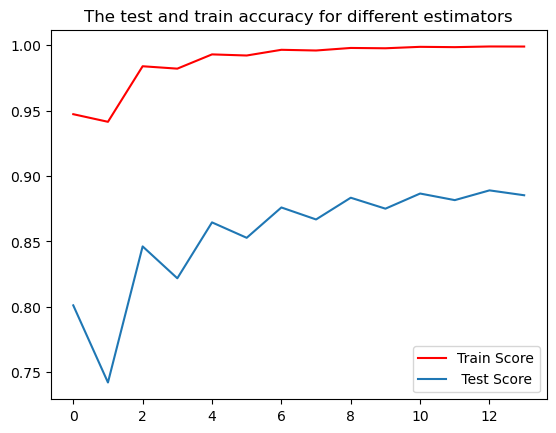

13


In [45]:
plt.figure()
plt.title('The test and train accuracy for different estimators')
plt.plot(dt_train,color='red',label='Train Score')
plt.plot(dt_test,label=' Test Score')
plt.legend()
plt.show()
print(depth[np.argmax(dt_test)])

In [46]:
rdfrt = RandomForestClassifier(n_estimators=13,random_state=1)
rdfrt.fit(X_bal, y_bal)
print(f"Random Forest train: {rdfrt.score(X_bal, y_bal)}")
print(f"Random Forest test: {rdfrt.score(X_test1, y_test)}")

Random Forest train: 0.9990569318850661
Random Forest test: 0.8890301648544371


In [47]:
# Predicting the test set results
y_pred_rd = rdfrt.predict(X_test1)

In [48]:
con_mat_RF = confusion_matrix(y_test, y_pred_rd)
df_cm_RF = pd.DataFrame(con_mat_RF, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
df_cm_RF

,Predicted 0,Predicted 1
True 0,2826,1320
True 1,1211,17451


## XGboost Classifier

In [49]:
XGB_model = XGBClassifier(random_state=1)
XGB_model.fit(X_bal, y_bal)

print(f"XG Boost train score: {XGB_model.score(X_bal, y_bal)}")
print(f"XG Boost test score: {XGB_model.score(X_test1, y_test)}")

XG Boost train score: 0.9479372893145701
XG Boost test score: 0.9077955103472466


Logistic regression is the best model 

## Testing

In [50]:
input_string = "The waiting time was really long."
print("\nPrediction on an input string: " + input_string)
print("Logistic Regression model:",logisreg.predict(vect_1.transform([function_clean(input_string)])))
print("Random Forest model      :",rdfrt.predict(vect_1.transform([function_clean(input_string)])))
print("XGboost model            :",XGB_model.predict(vect_1.transform([function_clean(input_string)])))


Prediction on an input string: The waiting time was really long.
Logistic Regression model: [0]
Random Forest model      : [1]
XGboost model            : [0]


In [51]:
input_string = " people that works here for sure is friendly! :)I do love that big menu book and seems like there are a lot of items to choose from. This is always nice as Vietnamese food is definitely more than pho and more spring rolls."
print("\nPrediction on an input string: " + input_string)
print("Logistic Regression model:",logisreg.predict(vect_1.transform([function_clean(input_string)])))
print("Random Forest model      :",rdfrt.predict(vect_1.transform([function_clean(input_string)])))
print("XGboost model            :",XGB_model.predict(vect_1.transform([function_clean(input_string)])))


Prediction on an input string:  people that works here for sure is friendly! :)I do love that big menu book and seems like there are a lot of items to choose from. This is always nice as Vietnamese food is definitely more than pho and more spring rolls.
Logistic Regression model: [1]
Random Forest model      : [1]
XGboost model            : [1]


In [53]:
# Calculate classification report for Logistic Regression
report_logreg = classification_report(y_test, y_pred_logisreg, output_dict=True)
precision_logreg = report_logreg['weighted avg']['precision']
recall_logreg = report_logreg['weighted avg']['recall']
f1_logreg = report_logreg['weighted avg']['f1-score']

In [55]:
# Calculate classification report for Random Forest
report_rf = classification_report(y_test, y_pred_rd, output_dict=True)
precision_rf = report_rf['weighted avg']['precision']
recall_rf = report_rf['weighted avg']['recall']
f1_rf = report_rf['weighted avg']['f1-score']

In [56]:
# Calculate classification report for XGBoost
report_xgb = classification_report(y_test, XGB_model.predict(X_test1), output_dict=True)
precision_xgb = report_xgb['weighted avg']['precision']
recall_xgb = report_xgb['weighted avg']['recall']
f1_xgb = report_xgb['weighted avg']['f1-score']

In [57]:
# Define function to extract metric scores from classification report
def extract_metric(report, metric):
    return [report[model]['weighted avg'][metric] for model in models]

In [58]:
# Define models and metrics
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
metrics = ['precision', 'recall', 'f1-score']

In [59]:
# Initialize empty dictionaries to store metric scores
metric_scores = {metric: {} for metric in metrics}

In [61]:
# Calculate classification report for each model and metric
for metric in metrics:
    for model in models:
        if model == 'Logistic Regression':
            report = classification_report(y_test, y_pred_logisreg, output_dict=True)
            metric_scores[metric][model] = report['weighted avg'][metric]
        elif model == 'Random Forest':
            report = classification_report(y_test, y_pred_rd, output_dict=True)
            metric_scores[metric][model] = report['weighted avg'][metric]
        elif model == 'XGBoost':
            report = classification_report(y_test, XGB_model.predict(X_test1), output_dict=True)
            metric_scores[metric][model] = report['weighted avg'][metric]

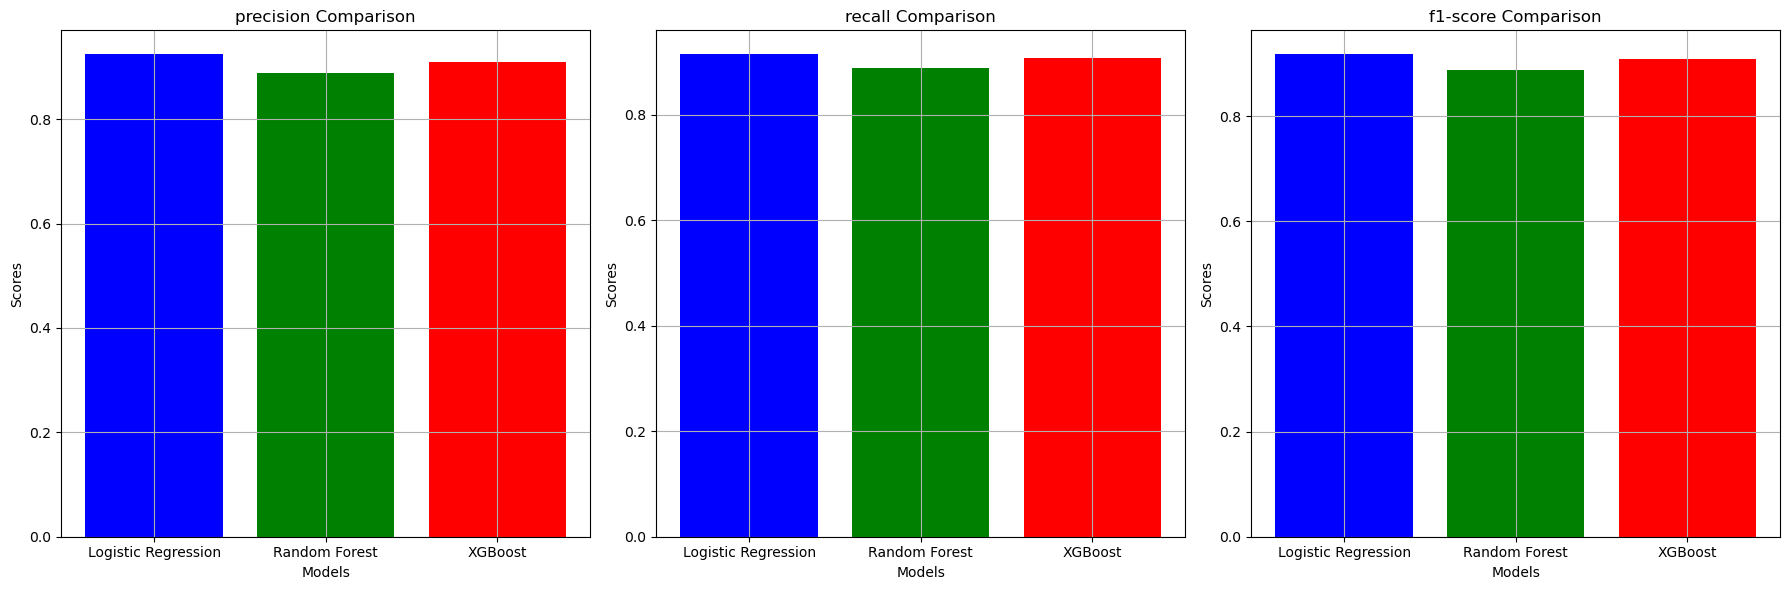

In [62]:
# Plot bar graphs for each metric
plt.figure(figsize=(18, 6))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    plt.bar(models, [metric_scores[metric][model] for model in models], color=['blue', 'green', 'red'])
    plt.xlabel('Models')
    plt.ylabel('Scores')
    plt.title(f'{metric} Comparison')
    plt.grid(True)

plt.tight_layout()
plt.show()